# The Dalem pumping test (semi-confined, Hantush type)

IHE, Transient groundwater

Olsthoorn, 2019-01-03

The most  famous book on pumping test analyses is due to Krusemand and De Ridder (1970, 1994). Their book contains all known solutions suitable for the analyses of pumping tests on groundwater wells and some examples with data.

The Dalem pumping test, held in the Netherlands, is a test in a semi-confined setting, which should yield a value for the aquifers' transmissivity $kD$ `[m2/d]` and its storage coefficient $S$ `[-]` and the hydraulic resistance $c$ `[d]`.

The situation in cross section is hier (taken from Kruzeman and De Ridder (1994).

![Dalem](Dalem_situation.png)

Hantush considered the transient flow due to a well with a constant extraction since $t=0$ placed in a uniform confined aquifer of infinite extent that is covered by a layer with uniform hydralic resistance against vertical flow and a fixed head equal to zero maintained above this covering layer.

The test can be interpreted from the Theis or the Hantush point of view, i.e. without or with leakage from a layer with fixed head. Which of the two may be deduced from the data: will they fit onto the Theis type curve or, when not, do they match with one of the Hantush type curves. Other effects may also influence the data, like partial penetration of the screen in the aquifer, storage inside the well and delayed yield and, notably, any effects caused by non-linearity, such as non-constant aquifer thickness under the influence of the drawdown in water table aquifers. All such effects may play their role under various circumstances, but may initially be ignored, to be included only when the data show that it is necessary.

The data for the pumping test are in a small text file  ["Dalem_data.txt"](./Dalem_data.txt), which we'll open and read into this notebook shortly.

We will interpret the test using the Hantush solution for flow to a single well with fully penetrating screen in a uniorm aquifer of infinite extent having as yet unknown transmissivity $kD$ and storage coefficient $S$.

$$ s(r, t) = \frac Q {4 \pi kD} W_h(u, \frac r \lambda),\,\,\,\, u = \frac {r^2 S} {4 kD t}, \,\,\,
\lambda = \sqrt{kD c}$$

The Hantush well function will be implentend first as it is not available in  `scipy.special`.

In [5]:
from scipy.special import exp1
import numpy as np
import matplotlib.pyplot as plt

## The Hantush well function

$$ W(u, \frac r \lambda) = \intop _u ^\infty \frac {e^{-y - \frac {\left( \frac r {\lambda} \right) ^2} {4 y} }} y dy $$

The implementation is readily done by numeric integration using Simpsons rule, with sufficient points te make sure the function is computed accurately enough.

In [17]:
def Wh(U, rho):
    '''Return Hantus well function for vector of u values and single rho'''
    W = np.zeros_like(U)
    for i, u in enumerate(U):
        W[i] = wh(u, rho)
    return W

def wh(u, rho):
    '''Return Wh(u, rho) for single value of u and rho'''
    uMax = 20 # sufficiently high
    y = np.logspace(np.log10(u), np.log10(uMax), 1000) # enough points, log axis
    ym = 0.5*(y[:-1] + y[1:])
    dy = np.diff(y)
    return np.sum(np.exp(-ym - rho**2 / (4 * ym)) / ym * dy)

## Read the data

In [6]:
fname = './Dalem_data.txt'

with open(fname, 'r') as f:
    data = f.readlines() # read the data as a list of strings
    
hdr = data[0].split() # get the first line, i.e. the header
data = data[1:] # remove the header line from the data

In [7]:
# split each line (string) into its individual tokens
# each token is still a string not yet a number
toklist = [d.split() for d in data]

# convert this list of lines with string tokens into a list of lists with numbers
data = [] # start empty
for line in toklist:
    data.append([float(d) for d in line]) # convert this line

# when done, convert this list of lists of numbers into a numpy array    
data = np.array(data)
#data # show what we've got

In [8]:
# get the piezometer distances from the first data column, the unique values
distances = np.unique(data[:,0])

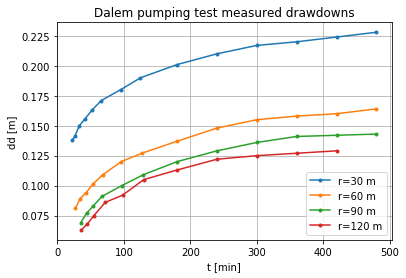

In [9]:
plt.title('Dalem pumping test measured drawdowns')
plt.xlabel('t [min]')
plt.ylabel('dd [m]')
plt.grid()

for r in distances:
    I = data[:,0] == r # boolean array telling which data belong to this observation well
    plt.plot(data[I, -2], data[I,-1], '.-', label='r={:.0f} m'.format(r))
plt.legend()
plt.show()

## Same, but using log scale

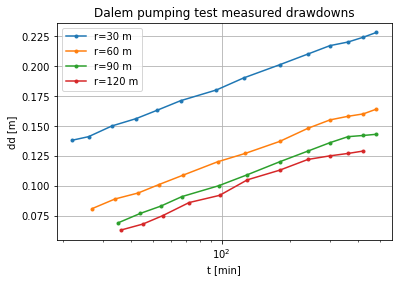

In [10]:
plt.title('Dalem pumping test measured drawdowns')
plt.xlabel('t [min]')
plt.ylabel('dd [m]')
plt.xscale('log')
plt.grid()

for r in distances:
    I = data[:,0] == r
    plt.plot(data[I,-2], data[I,-1], '.-', label='r={:.0f} m'.format(r))
plt.legend()
plt.show()

## Drawdown on double log scale

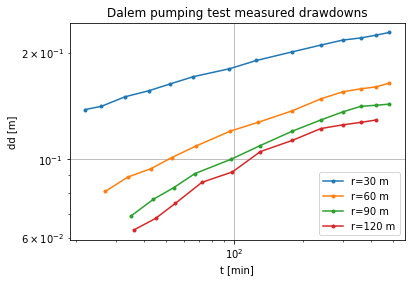

In [11]:
plt.title('Dalem pumping test measured drawdowns')
plt.xlabel('t [min]')
plt.ylabel('dd [m]')
plt.xscale('log')
plt.yscale('log')
plt.grid()

for r in distances:
    I = data[:,0] == r
    plt.plot(data[I,-2], data[I,-1], '.-', label='r={:.0f} m'.format(r))
plt.legend()
plt.show()

## Drawdown on double log scale using $t/r^2$ on x-axis

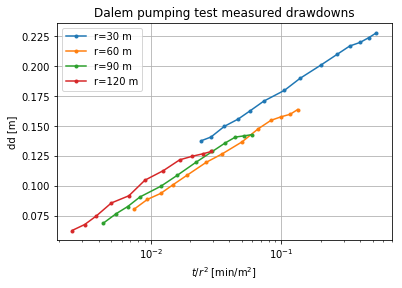

In [12]:
plt.title('Dalem pumping test measured drawdowns')
plt.xlabel('$t/r^2$ [min/m$^2$]')
plt.ylabel('dd [m]')
plt.xscale('log')
#plt.yscale('log')
plt.grid()

for r in distances:
    I = data[:,0] == r
    tr2 = data[I, -2] / r**2
    plt.plot(tr2, data[I,-1], '.-', label='r={:.0f} m'.format(r))
plt.legend()
plt.show()

## Interpretation using the match on double log scales (Classical method)

The classical interpreation plots the measured drawdowns on double log paper (drawdown $s$ versus $t/r^2$ and compares them with the Theis type curve $W(u)$ versus $1/u$ also drawn on double log paper. Because $1/u = (4 kD t) / (r^2 S)$ it follows that on logarthmic scales $1/u$ and $t/r^2$ differ only by a constant factor, which represents a horizontal shift on the log scale. The drawdown $s$ only differs the constant $Q/(4 \pi kD$ from the well function $W(u)$, and so  this implies a vertical shift on logarithmic scale. Hence the measured drawdown versus $t/r^2$ on double log scale looks exactly the same as the theis type curve but it is only shifted a given distance along the horizontal axis and a given distance along the vertical axis. These two shifts yield the sought transmissivity and storage coefficient.

Below we draw the Theis type curve and the drawdown $s$ multiplied by a factor $A$ and the $t/r^2$ multiplied by a factor $B$, choosing $A$ and $B$ interactively untill the measured and the type curve match best.

In this worked out example, I already optmized the values of $A$ and $B$ by hand. Set them both to 1 and try optimizing them yourself.

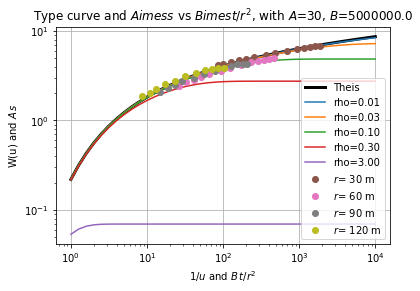

In [32]:
A = 30
B = 5.0e6
u = np.logspace(-4, 0, 41)
plt.title('Type curve and $A \times s$ vs $B \times t/r^2$, with $A$={}, $B$={}'.format(A, B))
plt.xlabel('$1/u$ and $B \, t/r^2$')
plt.ylabel('W(u) and $A \, s$')
plt.xscale('log')
plt.yscale('log')
plt.grid()

# the Theis type curve
plt.plot(1/u, exp1(u), 'k', lw=3, label='Theis')

for rho in [0.01, 0.03, 0.1, 0.3, 3]:
    plt.plot(1/u, Wh(u, rho), label='rho={:.2f}'.format(rho))

# The measurements
for r in distances :
    I = data[:,0] == r
    t = data[I,-2] / (24 * 60)
    s = data[I,-1] # Q /(4 * np.pi * kD) * exp1(r**2 * S / (4 * kD * t))
    plt.plot(B * t/r**2, A * s, 'o', label='$r$= {:.3g} m'.format(r))
    
plt.legend()
plt.show()
            

So $A s = W(u)$ and $s = \frac Q {2 \pi kD} W(u)$ and, therefore $A = \frac {4 \pi kD} {Q}$ and $ kD = \frac {A Q} {4 \pi}$

In [29]:
Q = 761 # m3/d
kD = A * Q /4 /np.pi
print('kD = {:.0f} m2/d'.format(kD))

kD = 1817 m2/d


The storage coefficient then follows from

$\frac 1 u = B \frac t {r^2}$, that is, $\frac {4 kD t} {r^2 S} = B \frac t {r^2}$ so that $S = \frac {4 kD} B$

In [30]:
S = 4 * kD / B
print('S = {:.2e} [-]'.format(S))

S = 1.45e-03 [-]


The vertical resistance is obtained from observing which of the lines depending on $\rho$ the measurements of the individual piezomters follow. In this case, the $r=30$ m piezometer seems to follow the type curve for $\rho = 0.03$ and the 90 m curve seems to follow the $\rho = 0.1$ type curve.

$$\rho = r / \lambda$$

then yields

$$ \lambda = \sqrt{kD c} = \frac r \rho $$

and

$$ c = \frac {\left( \frac r \rho \right)^2} {kD} $$


In [34]:
r = 30
rho = 0.03
c = (r/rho)**2 / kD
print('c = {:.0f}'.format(c))

c = 550


In [35]:
r = 90
rho = 0.1
c = (r/rho)**2 / kD
print('c = {:.0f}'.format(c))

c = 446


As one sees, the results for both the observation wells are consistent.

## Discussion

In this particular case, it was not too clear which of the type curves the individual piezometers followed. This is due to a too short duration of the pumping test. The longer the test lasts, the more the measured dots will creep along their specific type curve. Comparison between the measurements and the actual type curves reveals that a ten times longer test would have brought this sought progress. The test now lasted for about 0.23 days, which is really short. Extending the test to 2 days would have been enough to get a more accurate result. 

Kruzeman and the Ridder (1970) used several other methods to analyze this test.

One of the methods is De Glee (1930) analysis of the final drawdown. However, the time drawdown graphs show that the final drawdown was not reached and so required some arbitrary extrapolation. As they show, steady state approach to a transient pumping test is often possible by using the difference of the head between piezometers. This often works because the difference between (nearby) piezometers becomes steady much earlier than the absolute drawdown. However, the difference between the observed drawdown between two piezometers may be less accurate than their absolute values. And, obviously, a steady-state analyses never yields a value for the storage coefficient.

Kruzeman and De Ridder also interpreted the straigh line portion of the curves drawn on half-log scale ($s$ versus log $t/r^2$). This works if a long-enough straigt portion develops on half-log plots. This is not always the case, however.

One important point to consider with semi-confined aqufiers is that the assumption that the head in the top layer is maintained may not be valid. This head will decline due to the pumping, however it will do so at a lower rate because the specific yield is genearlly two orders of magnitude larger than the elastic storarge. What then happens is the development of delayed yield. At first the drawdown behaves as if the strorage is only elastic, but after time it will behave as if the system has a free water table with specific yield. On time-drawdown curves one will see that the measured drawdown follows the two Theis drawdown curves that belong to the two storage coefficients. On half or double log $t$ or $t/r^2$ scales the shift of the Theis type curve for the yield curve with respect to that for the elastic storage is equal to the ratio of the specific yield and the elastic storage coefficient. This follows immediately from the values of $1/u$. Because $kD$, $r$ and $t$ are the same for both curves, the shift on the log axis is given by the ratio is $(1/u_1) / (1/u_2) = u_2/u_1 = S_2 / S_1 \approx 0.1 / 0.001 = 100$

Most importantly for practice, perhaps, is that a short pumping test in a semi-confined aquifer may completely hide the delayed drawdown of the water table, which may lead to conclusions about the absense of impact on the shallow groundwater system and its depending functions, that are simply not valid, as the final water table drawdown was not revealed during the (too short) pumping test.

# Modern methods

We now obtimized the two factors A and B by hand which yielded $kD$ and $S$ and then found the resistance $c$ from the type curve that was followed by the individual piezometers . This was relatively straight-forward for this case in which only three parameters were involved. However in more complicated cases, finding the optimum parameter combination by trial and error takes much more effort, and often times is veritually impossible. Therefore, the modern way is to let the computer find the optimum combination of parmeters, which minimizes the difference between the type curve (or the model) and the measurements.

## Conclusion

This notebook shows how an analysis of a pumping test can be done by first exploring the data and then applying several methods to see what works. If only the final answer is of interest, then copy that result to another document or notebook to continue working with that results. However, this current notebook is and will always remain a good reference as it is completely documented and clearly shows all the steps taken to explore the problem and to find one or more suitable answers.

## Bibliography

Kruzeman, G.P and N.A. de Ridder (1970) Analysis and evaluation of pumping test data. ILRI, Bulletin 11. 200pp.

Note that the more extended version of this book is available for free on the internet and dates of 1994/95